In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# beta calculation
def get_beta(state, y):
    X = np.array([np.ones(state.shape[0]), state, state**2]).T
    return np.linalg.inv(X.T@X)@X.T@y

def predict(state, beta):
    X = np.array([np.ones(state.shape[0]), state, state**2]).T
    return X@beta

In [3]:
def next_cashflow(cashflow_prev, exercise_prev):
    t = cashflow_prev.shape[0]
    y = 0
    for i in range(t):
        y += cashflow_prev[i]*np.exp(-(i+1)*r*dt)
    X = scenarios[:, -(t+1)]
    exercise_value = np.fmax(K-X, 0)
    range_filtered = exercise_value > 0
    beta = get_beta(X[range_filtered], y[range_filtered])
    exercise = np.vstack(((exercise_value > predict(X, beta)) & range_filtered, exercise_prev))
    exercise[1:, exercise[0]] = False
    cashflow = np.vstack((np.where(exercise[0], exercise_value, 0), cashflow_prev))
    cashflow[1:, exercise[0]] = 0
    return cashflow, exercise

In [4]:
def get_cashflow(scenarios):
    n = scenarios.shape[1]-2
    cashflow = np.fmax(K-scenarios[:, -1], 0).reshape(1, -1)
    exercise = cashflow > 0

    for _ in range(n):
        cashflow_prev = cashflow.copy()
        exercise_prev = exercise.copy()
        cashflow, exercise = next_cashflow(cashflow_prev, exercise_prev)
    
    return cashflow, exercise

In [5]:
def american_option(cashflow):
    t = cashflow.shape[0]
    y = 0
    for i in range(t):
        y += cashflow[i]*np.exp(-(i+1)*r*dt)
    return y.mean()

In [22]:
S = 36
sigma = 0.2
T = 2
dt = 1/50
N = (int) (T/dt)
r = 0.06
K = 40
num = 100000

In [23]:
scenarios = np.zeros([num, N+1])
scenarios[:, 0] = S
np.random.seed(1234)
dZ = np.random.normal(size=(num, N))
for i in range(N):
    scenarios[:, i+1] = scenarios[:, i]*(1+r*dt+sigma*np.sqrt(dt)*dZ[:, i])

In [24]:
cashflow, exercise = get_cashflow(scenarios)
american_option(cashflow)

4.816384988389305

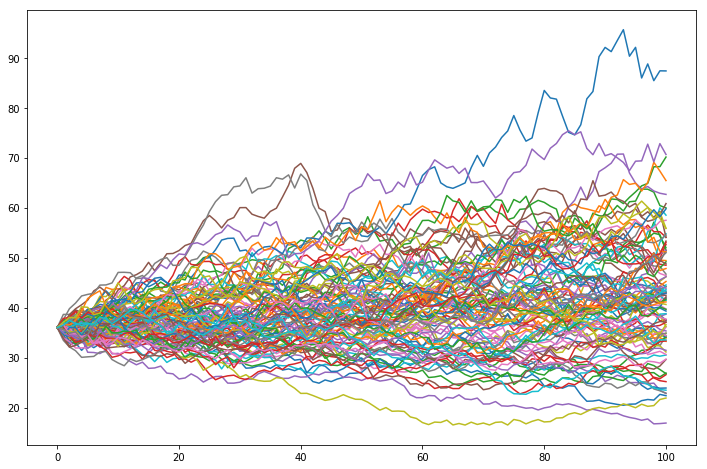

In [25]:
plt.figure(figsize=(12, 8))
for i in range(100):
    plt.plot(scenarios[i, :])
plt.show()

In [12]:
scenarios = np.array([
    [1.00, 1.09, 1.08, 1.34],
    [1.00, 1.16, 1.26, 1.54],
    [1.00, 1.22, 1.07, 1.03],
    [1.00, 0.93, 0.97, 0.92],
    [1.00, 1.11, 1.56, 1.52],
    [1.00, 0.76, 0.77, 0.90],
    [1.00, 0.92, 0.84, 1.01],
    [1.00, 0.88, 1.22, 1.34]
])

K = 1.10
r = 0.06